<a href="https://colab.research.google.com/github/IvannikovG/torch_refreshing/blob/main/putting_together.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

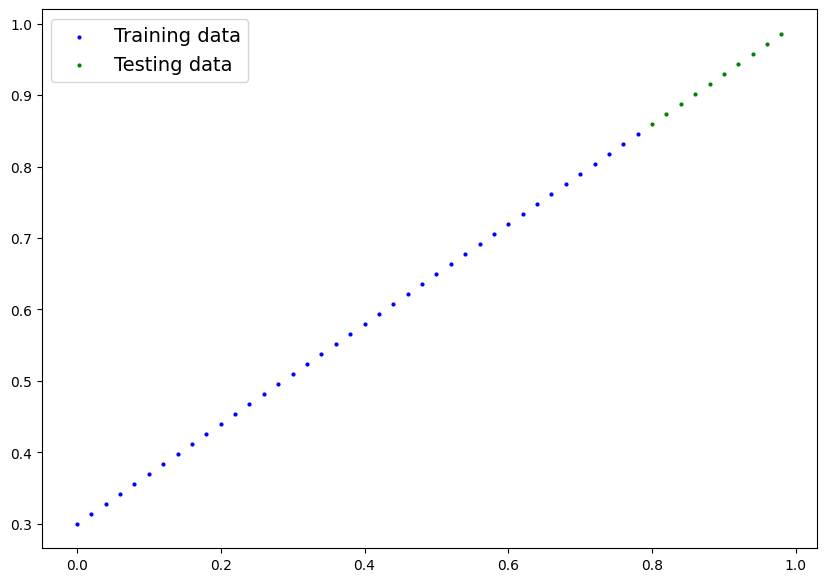

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias

sample_percentage = 0.8
train_split = int(sample_percentage * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

def plot_predictions(train_data=X_train, train_labels=y_train,
                     test_data=X_test, test_labels=y_test,
                     predictions=None):
  '''Plots training data, test data and compares predictions'''

  plt.figure(figsize=(10, 7))

  # Plot training data is in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
  # Plot test data in green

  plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=3, label='Predictions')

  plt.legend(prop={"size": 14,});


plot_predictions(X_train, y_train, X_test, y_test)

In [2]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [3]:
device = next(model_1.parameters()).device
device

device(type='cpu')

In [4]:
model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [13]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.001)

In [6]:
X_train[:5]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])

In [14]:
torch.manual_seed(42)
epochs = 500
for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)
  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch}, Loss {loss}, Test loss {test_loss}')

Epoch: 0, Loss 0.010256484150886536, Test loss 0.012454730458557606
Epoch: 10, Loss 0.0006695427000522614, Test loss 0.0014927327865734696
Epoch: 20, Loss 0.00032303109765052795, Test loss 0.0006653607124462724
Epoch: 30, Loss 0.0005198411527089775, Test loss 0.00040593743324279785
Epoch: 40, Loss 0.0005198411527089775, Test loss 0.00040593743324279785
Epoch: 50, Loss 0.0005198411527089775, Test loss 0.00040593743324279785
Epoch: 60, Loss 0.0005198411527089775, Test loss 0.00040593743324279785
Epoch: 70, Loss 0.0005198411527089775, Test loss 0.00040593743324279785
Epoch: 80, Loss 0.0005198411527089775, Test loss 0.00040593743324279785
Epoch: 90, Loss 0.0005198411527089775, Test loss 0.00040593743324279785
Epoch: 100, Loss 0.0005198411527089775, Test loss 0.00040593743324279785
Epoch: 110, Loss 0.0005198411527089775, Test loss 0.00040593743324279785
Epoch: 120, Loss 0.0005198411527089775, Test loss 0.00040593743324279785
Epoch: 130, Loss 0.0005198411527089775, Test loss 0.00040593743324

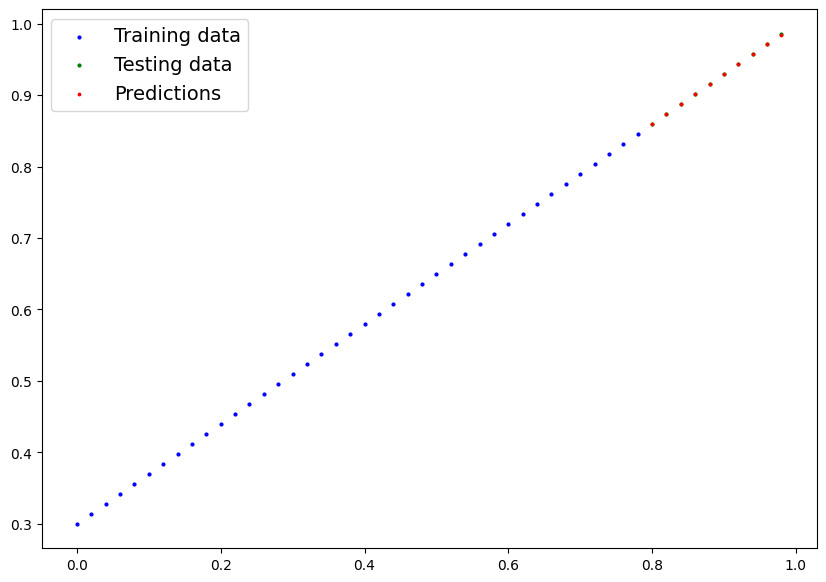

In [15]:
# Use model
model_1.eval()

# Make predictions on test data
with torch.inference_mode():
  y_preds = model_1(X_test)


plot_predictions(predictions=y_preds)

In [19]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [22]:
loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [23]:
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

loaded_model_1_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])